<a href="https://colab.research.google.com/github/rja868/fraud-detection-models/blob/main/fraud_detection_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Coding Assignment #3 - Fraud Detection Models

# Introduction to Fraud Detection Assignment

In this assignment, you will embark on an analytical journey to explore and model a dataset of card transactions with the aim of detecting fraudulent activities. The provided dataset includes various features such as distance from home, transaction details, and purchase patterns, which are essential in understanding the characteristics of fraudulent transactions. You will use Python and key machine learning libraries to analyze this dataset, build a classification model, and evaluate its performance.

## Base Code Provided
- The base code includes necessary Python imports and a decision tree model for initial analysis.
- You will start with a dataset of card transactions, exploring its structure, summary statistics, and event rate.
- The base code will guide you through data loading, preprocessing, model training, and evaluation.
- A visual representation of the decision tree will be created to help understand the model's decision-making process.

## Your Tasks
- **Data Analysis**: Deepen your understanding of the dataset by performing additional exploratory data analysis.
- **Model Building and Evaluation**: Beyond the decision tree, experiment with another model such as Random Forest to compare performance.
- **Performance Metrics**: Evaluate models using metrics like precision, recall, and F1-score, and understand the implications of these metrics in the context of fraud detection.
- **Advanced Techniques** (Extra Credit): Implement data balancing, feature importance analysis, and cross-validation to enhance model performance and robustness.

## Learning Outcomes
- Gain practical experience in handling real-world datasets.
- Develop skills in building and evaluating classification models.
- Learn to interpret model results and make data-driven decisions.
- Explore advanced machine learning techniques (optional extra credit).

## Submission Guidelines
- Submit your enhanced code with clear documentation and comments.
- Include a report or inline comments analyzing your findings and model performances.
- Ensure your code is clean, well-organized, and reproducible.


# Paul's Code


--- First 5 rows of data ---
   distance_from_home  distance_from_last_transaction  \
0           57.877857                        0.311140   
1           10.829943                        0.175592   
2            5.091079                        0.805153   
3            2.247564                        5.600044   
4           44.190936                        0.566486   

   ratio_to_median_purchase_price  repeat_retailer  used_chip  \
0                        1.945940              1.0        1.0   
1                        1.294219              1.0        0.0   
2                        0.427715              1.0        0.0   
3                        0.362663              1.0        1.0   
4                        2.222767              1.0        1.0   

   used_pin_number  online_order  fraud  
0              0.0           0.0    0.0  
1              0.0           0.0    0.0  
2              0.0           1.0    0.0  
3              0.0           1.0    0.0  
4              0.0        

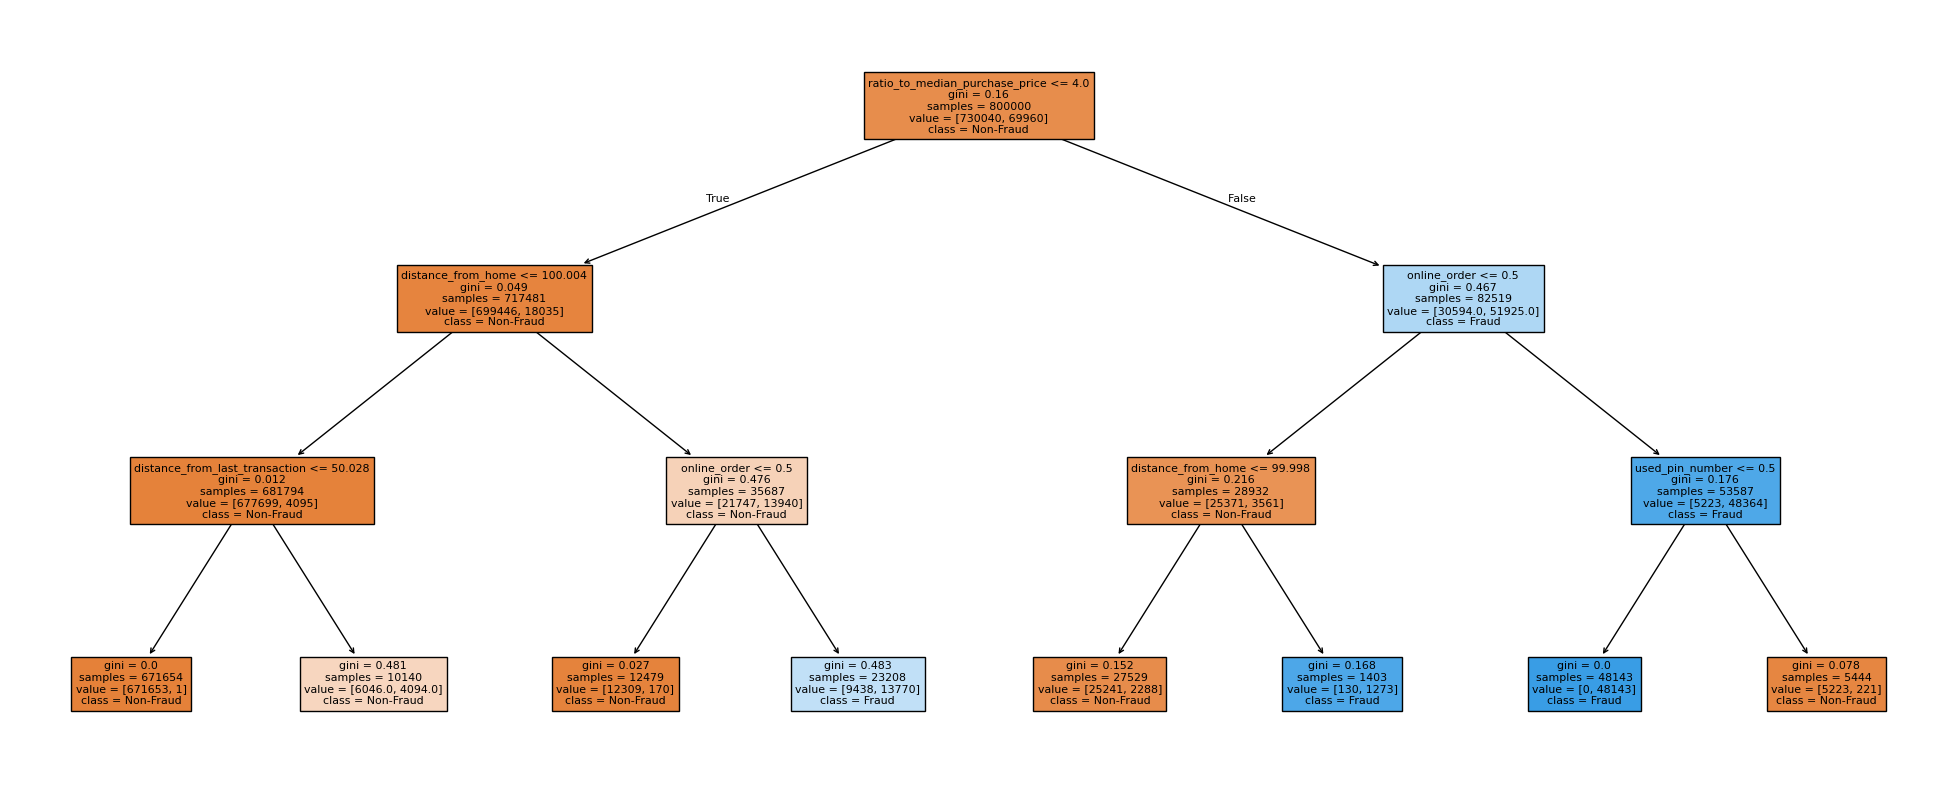

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Load the dataset
url = 'https://raw.githubusercontent.com/marhcouto/fraud-detection/master/data/card_transdata.csv?raw=true'
data = pd.read_csv(url)

# Print the top 5 rows
print("\n--- First 5 rows of data ---")
print(data.head(5))

# Print summary stats
print("\n--- Summary Statistics ---")
print(data.describe())

# Event rate
print("\n--- Event Rate ---")
event_rate = data['fraud'].mean() * 100
print(f'Event Rate: {event_rate:.2f}%')

# Define the atrributes (X) and the label (y)
X = data.drop('fraud', axis=1)
y = data['fraud']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize a decision tree classifier
model = DecisionTreeClassifier(max_depth=3) #max_depth is maximum number of levels in the tree

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy_dt = accuracy_score(y_test, y_pred)
confusion_dt = confusion_matrix(y_test, y_pred)
classification_rep_dt = classification_report(y_test, y_pred)

# Print the results
print("\n--- Model Performance Metrics ---")
print(f"Accuracy: {accuracy_dt:.2f}")
print("Confusion Matrix:")
print(confusion_dt)
print("Classification Report:")
print(classification_rep_dt)

# Visualize the decision tree
plt.figure(figsize=(25, 10))
plot_tree(model,
          filled=True,
          feature_names=['distance_from_home', 'distance_from_last_transaction', 'ratio_to_median_purchase_price',
                         'repeat_retailer', 'used_chip', 'used_pin_number', 'online_order'],
          class_names=['Non-Fraud', 'Fraud'])
plt.show()

## Fraud Detection Model Workflow Summary

1. **Import Libraries**
   - `pandas` for data handling.
   - `numpy` for numerical operations.
   - `sklearn` for machine learning tools.
   - `matplotlib` for data visualization.

2. **Load Dataset**
   - Data is loaded from a remote URL using `pandas.read_csv`.

3. **Initial Data Exploration**
   - Initial examination using `data.head()` and `data.tail()` to understand dataset structure.

4. **Data Preparation**
   - Features (`X`) and target variable (`y`) are defined.
   - `fraud` column is the target, while others are features.

5. **Data Splitting**
   - Dataset is split into training and test sets.
   - `train_test_split` is used, with a test size of 20%.

6. **Model Initialization**
   - Decision Tree Classifier initialized with a maximum depth of 3.
   - Limits complexity and overfitting of the model.

7. **Model Training**
   - Model is trained using the training set (`X_train`, `y_train`).

8. **Prediction and Evaluation**
   - Model predictions made on the test set.
   - Evaluation using accuracy, confusion matrix, and classification report.

9. **Visualization**
   - Decision tree visualized using `matplotlib` and `sklearn.tree.plot_tree`.
   - Helps in understanding the decision-making process of the model.

# Commentary
- This code effectively demonstrates the end-to-end process of a machine learning project.
- Decision trees are a good choice for fraud detection due to their interpretability.
- The model is simple yet provides a decent understanding of the basic approach to fraud detection in financial transactions.
- Visualization is a key aspect, especially in complex domains like fraud detection, for understanding the model's decision criteria.

# Model Performance Analysis and Commentary

- **Data Overview**
  - First 5 rows show a mix of numerical features like `distance_from_home`, `distance_from_last_transaction`, etc., crucial for predicting fraud.
  - Summary statistics indicate a varied distribution of values, with some features having a wide range (e.g., `distance_from_home`).

- **Model Accuracy**
  - High accuracy of 98% suggests the model is very effective in classifying transactions as fraudulent or non-fraudulent.

- **Confusion Matrix Analysis**
  - Low number of false positives (2481) and false negatives (1646) compared to true positives and negatives.
  - Indicates a good balance in identifying both fraudulent and non-fraudulent transactions accurately.

- **Classification Report Insights**
  - High precision (0.99) for class 0 (Non-Fraud) and good precision (0.86) for class 1 (Fraud).
  - Recall is also high for both classes, especially for class 1 (0.91), which is critical in fraud detection.
  - F1-scores are robust, indicating a balanced model considering both precision and recall.

- **Overall Evaluation**
  - The decision tree model shows excellent performance in identifying fraud.
  - The balance between precision and recall, especially for fraud detection (class 1), is commendable.
  - High accuracy combined with the detailed metrics suggest a well-tuned model for this dataset.
  - The model could be further improved by exploring feature engineering, trying other algorithms, or tuning hyperparameters.


# Coding Assignment:  Comparative Analysis of Fraud Detection Models

## Richard Albanese

# 1. Model Building

In [ ]:
# Import Necessary ML Tools from sklearn (other imports are handled above)
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import precision_score, recall_score

# Note: It is not necessary to scale the data for tree-based models

# Build a Random Forest model using the provided dataset
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
# n-estimators specifies the number of decision trees in the forest,  random_state=42 sets the random seed for reproducibility

# Train the model
model_rf.fit(X_train, y_train)

# Make the predictions
y_pred_rf = model_rf.predict(X_test)

# 2. Model Evaluation

In [ ]:
# Evaluate model performance
precision_rf = precision_score(y_test, y_pred_rf, average='binary') # 'binary' because the target variable is categorized into one of two possible classes
recall_rf = recall_score(y_test, y_pred_rf, average='binary')
confusion_rf = confusion_matrix(y_test, y_pred_rf)
classification_rep_rf = classification_report(y_test, y_pred_rf)


print("\n--- Random Forest Model Performance Metrics ---\n")
print(f"Precision: {precision_rf:.2f}")
print(f"Recall: {recall_rf:.2f}\n")
print("Confusion Matrix:")
print(confusion_rf)
print()
print("Classification Report:")
print(classification_rep_rf)


--- Random Forest Model Performance Metrics ---

Precision: 1.00
Recall: 1.00

Confusion Matrix:
[[182557      0]
 [     2  17441]]

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    182557
         1.0       1.00      1.00      1.00     17443

    accuracy                           1.00    200000
   macro avg       1.00      1.00      1.00    200000
weighted avg       1.00      1.00      1.00    200000



**Precision:**
This performance metric measures how often our model's positive predictions  were correct. Precision is calculated by dividing True Positives (17441) by all positive predictions (17441+0), which equal 1.00.  This is perfect precision because every instance predicted as positive is actually positive (there are no false positives).  

**Recall:**
Recall measures the model's ability to correctly identify all the instances of a particular class.  This is calculated by dividing True Positives (17441) by True Positives + False Negative (17441 + 2).  This computes to 0.999 which appears be rounded up to 1.00.  There were two instances of a positive actual value that were missed by the model, so it's not perfect recall, but very close.  In other words, there were two instances where the model predicted "no fraud" but they were, in fact, fraud.  

**Confusion Matrix:**
The confusion matrix for the random forest model can be interpreted as follows:
* Upper left:  True negatives or instances where the model correctly predicted "no fraud".
* Upper right:  False positives or instances where the model incorrectly predicted "fraud"
* Lower left:  False negatives or instances where the model incorrectly predicted "no fraud"
* Lower right:  True positives or instances where the model correctly predicted "fraud"  

# 3. Comparative Analysis

Let's start by printing each model's precision, recall and confusion metrices.





--------- Decision Tree Model Performance ---------

Precision: 0.86
Recall: 0.91




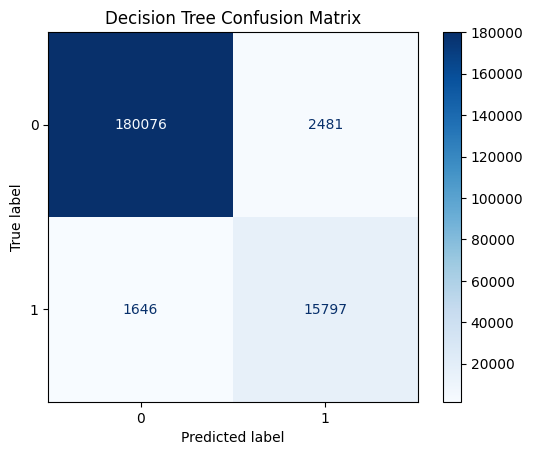


Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99    182557
         1.0       0.86      0.91      0.88     17443

    accuracy                           0.98    200000
   macro avg       0.93      0.95      0.94    200000
weighted avg       0.98      0.98      0.98    200000


--------- Random Forest Model Performance ---------

Precision: 1.00
Recall: 1.00

Confusion Matrix:


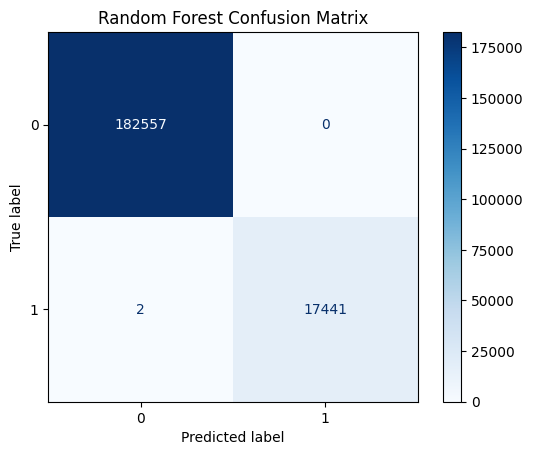

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    182557
         1.0       1.00      1.00      1.00     17443

    accuracy                           1.00    200000
   macro avg       1.00      1.00      1.00    200000
weighted avg       1.00      1.00      1.00    200000



In [ ]:
# Generate Precision and Recall Stats for Decision Tree
precision_dt = precision_score(y_test, y_pred, average='binary')
recall_dt = recall_score(y_test, y_pred, average='binary')
confusion_dt = confusion_matrix(y_test, y_pred)

print("\n--------- Decision Tree Model Performance ---------\n")  # Print metrics
print(f"Precision: {precision_dt:.2f}")
print(f"Recall: {recall_dt:.2f}\n")
print()

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_dt, display_labels=[0, 1])  # Display Confusion Matrix Visualization
disp.plot(cmap=plt.cm.Blues)
plt.title("Decision Tree Confusion Matrix")
plt.show()

print()
print("Classification Report:")
print(classification_rep_dt)

print("\n--------- Random Forest Model Performance ---------\n")
print(f"Precision: {precision_rf:.2f}")
print(f"Recall: {recall_rf:.2f}\n")
print("Confusion Matrix:")

disp1 = ConfusionMatrixDisplay(confusion_matrix=confusion_rf, display_labels=[0, 1])  # Display Confusion Matrix Visualization
disp1.plot(cmap=plt.cm.Blues)
plt.title("Random Forest Confusion Matrix")
plt.show()
print("Classification Report:")
print(classification_rep_rf)


The performance of the initial Decision Tree model was very good but the Random Forest model has improved it to a near perfect score for both Precision and Recall, although the Random Forest model did misclassify two cases where the actual target variable was fraud.

This improved performance is also evident in the confusion matrices, where the Random Forest model had zero false positives.  The initial Decison Tree model had 2481 false positives.  The other three quandrants of the confusion matrix were all stronger for our Random Forest model.

The Random Forest method of building multiple decision trees and combining their predictions has resulted in a classification model that outperforms the Decision Tree model.  This is evident across all performance metrics including precision, recall and f1-score and is clearly visible when comparing confusion matrices.

Next, we'll compare the precision and recall metrics using a bar chart.

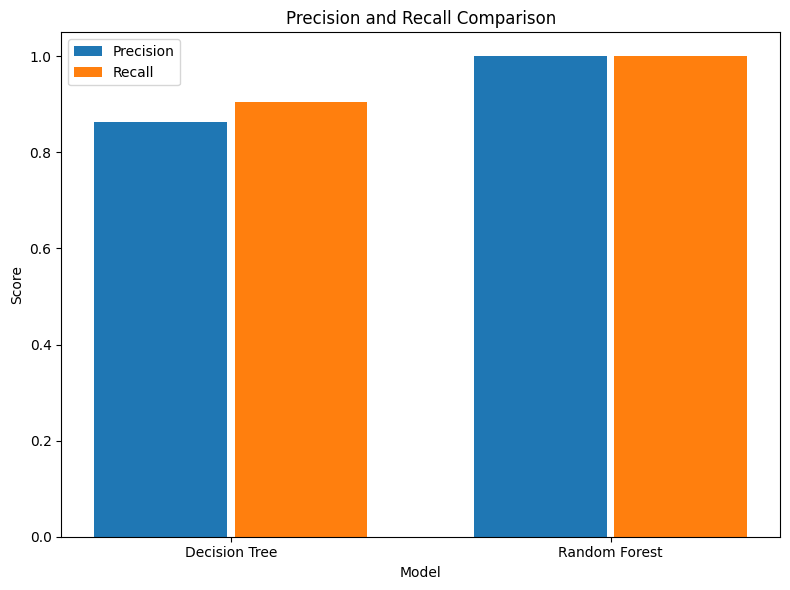

In [ ]:
# create a data frame for charting performance metrics
df_chart = pd.DataFrame({'Model': ['Decision Tree', 'Random Forest'],
                         'Precision': [precision_dt, precision_rf],
                         'Recall': [recall_dt, recall_rf]})

# Plot the bar chart
x = np.arange(len(df_chart['Model']))  # gets the number of models and creates an array of integers for positioning the labels on the x-axis
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(8, 6))
bars1 = ax.bar(x - (width/2 + 0.01), df_chart['Precision'], width, label='Precision')  # create a set of bars to represent precision
bars2 = ax.bar(x + (width/2 + 0.01), df_chart['Recall'], width, label='Recall')  # create a set of bars to represent

# Adding labels and titles
ax.set_xlabel('Model')
ax.set_ylabel('Score')
ax.set_title('Precision and Recall Comparison')
ax.set_xticks(x)
ax.set_xticklabels(df_chart['Model'])
ax.legend()

# Displaying the bar chart
plt.tight_layout()
plt.show()

# 4.  Reflection and Discussion

To gain a further understanding of the Random Forest model, let's examine which features contributed most to the model's predictions:

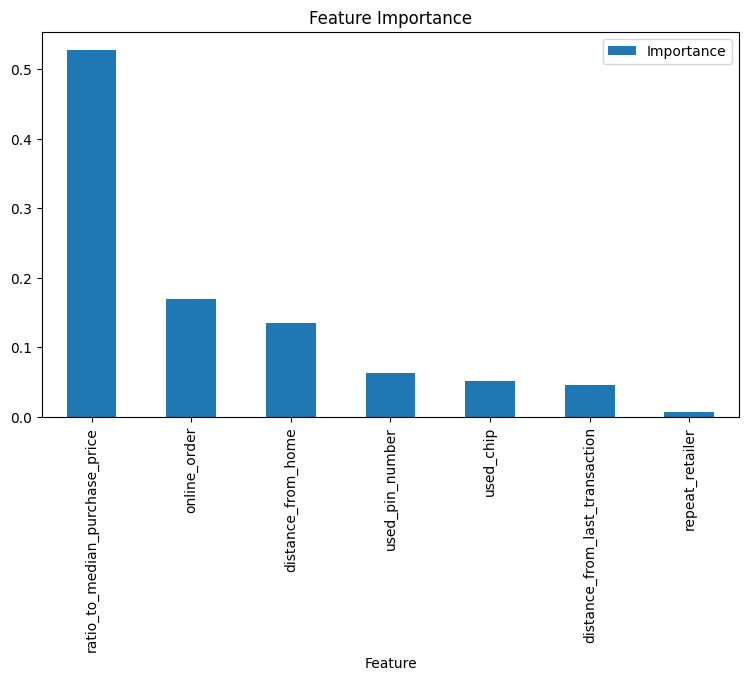

In [ ]:
# Get feature importances
feature_importances = model_rf.feature_importances_  # This attribute of the trained Random Forest model returns an array of importance scores for each feature.
feature_names = X_train.columns  # Get the name of the features from the training dataset
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})  # Combine the feature names and their importance scores into a DataFrame

# Sort and plot feature importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)  # Sort the DataFrame into descending order
importance_df.plot(kind='bar', x='Feature', y='Importance', title='Feature Importance', figsize=(9, 5))  # Create the bar chart
plt.show()


The bar chart above provides a visual representation of each feature's influence on the model's predictions.  The relative amount of the purchase - "ratio_to_median_purchase_price", is clearly the most important.  Whether or not the card number had been used at the retailer previously - "repeat_retailer" has the least influence on the model's predictions.

In the Decision Tree classifier model, Gini impurity is the default criterion, so the algorithm splits the root node on "ratio_to_median_purchase_price".  This feature minimizes Gini Impurity of the resulting child nodes.  The level 1 nodes then split on "distance_from_home" and "online_order", again seeking to minimize Gini Impurity of the resulting child nodes.  Even though the Decision Tree classifier is a much simpler model, its first three feature splits are the same features with the most influence on the Random Forest model.

Additionally, the Decision Tree model does not use "repeat_retailer" at all, probably because it was determined to have little or no relationship with the target variable.  This aligns with the Random Forest model which ranks "repeat_retailer" as the least influencial feature in the model.

In considering our Random Forest model performance, it is unlikely that our precision and recall score can be maintained.  Over time, fraudsters adapt to detection mechanisms, so a model with perfect precision today may not perform well later on.  

Also, the model could be overly conservative and flag very few transactions as frauds to avoid false positives.  This might increase cases where the transaction is fradulent but the model doesn't flag it (false negatives), which can be a costly problem in a fraud detection model.

Model performance can also be evaluated using the F1 Score to achieve a balance between precision and recall.

Regardless of how or why the model performance degrades, constant evaluation, retraining and updating will be necessary.

Unlike a single decision tree model, random forest models are generally robust to overfitting.  However, fraud detection often involves imbalanced data where the Random Forest may focus too much on legitimate transactions, weakening model performance.  Therefore, resampling techiniques can be used to handle imbalanced data.



# Extra Credit:  Advanced Model Enhancement and Evaluation
Richard Albanese

# 1. Balancing the Data:

In [ ]:
! pip install imbalanced-learn

from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

In [ ]:
print("Original class distribution:", Counter(y))  # Print original class distribution

random_undersampler = RandomUnderSampler(random_state=42)  # Initialize undersampler using a random state of 42
X_resampled, y_resampled = random_undersampler.fit_resample(X, y)  # Apply undersampling
print("Resampled class distribution:", Counter(y_resampled))  # Print resampled class distribution
X_resampled = pd.DataFrame(X_resampled, columns=X.columns)  # Convert resampled features to a DataFrame

# Split the dataset into training and testing sets
X_train_rs, X_test_rs, y_train_rs, y_test_rs = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Rebuild Random Forest model with balanced data
model_rf_balanced = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf_balanced.fit(X_train_rs, y_train_rs)  # Importantly, the resampled training data must be used

y_pred_rf_balanced = model_rf_balanced.predict(X_test_rs)


Original class distribution: Counter({0.0: 912597, 1.0: 87403})
Resampled class distribution: Counter({0.0: 87403, 1.0: 87403})


Above, we can see the counts for no-fraud (0.0) and fraud (1.0) for both the unbalanced and balanced datasets. I then rebuild the Random Forest model using the balanced dataset.

# 2. Cross-Validation

In [ ]:
# Import cross-validation tools
from sklearn.model_selection import cross_val_score, cross_validate, cross_val_predict


In [ ]:
# Perform cross-validation with multiple scoring metrics on the rebalanced Random Forest Model
# The data is split into 5 folds, then the model model_rf_balanced is trained on 4 folds of the data and evaluated on the remaining fold, 5 iterations are performed
cv_results = cross_validate(
    model_rf_balanced, X_resampled, y_resampled, cv=5,
    scoring=['accuracy', 'precision', 'recall', 'f1'],
    return_train_score=True
)

print("\n--------- Cross-Validation Results for Balanced Random Forest Model ---------\n")  # Print metrics
print("Test accuracy scores:", cv_results['test_accuracy'])
print(f"Mean accuracy: {np.mean(cv_results['test_accuracy']):.4f}")
print(f"Mean precision: {np.mean(cv_results['test_precision']):.4f}")
print(f"Mean recall: {np.mean(cv_results['test_recall']):.4f}")
print(f"Mean F1-score: {np.mean(cv_results['test_f1']):.4f}")


--------- Cross-Validation Results for Balanced Random Forest Model ---------

Test accuracy scores: [0.9999428  0.9999714  0.9999714  0.99988559 0.9999714 ]
Mean accuracy: 0.9999
Mean precision: 0.9999
Mean recall: 1.0000
Mean F1-score: 0.9999


In [ ]:
y_pred_cv = cross_val_predict(model_rf_balanced, X_resampled, y_resampled, cv=5)
confusion_rf_b = confusion_matrix(y_resampled, y_pred_cv)

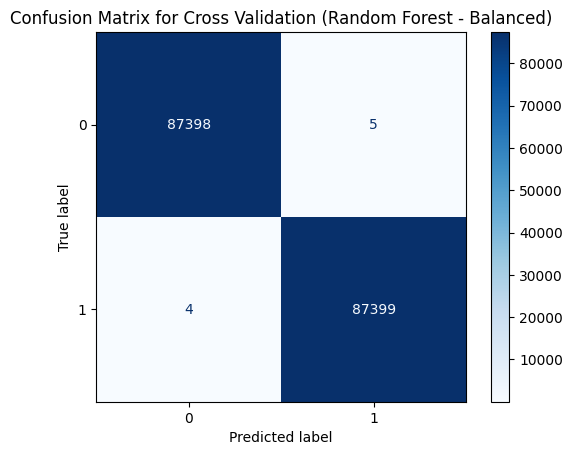

In [ ]:
disp2 = ConfusionMatrixDisplay(confusion_matrix=confusion_rf_b, display_labels=[0, 1])  # Display Confusion Matrix Visualization for Cross-Validation
disp2.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Cross Validation (Random Forest - Balanced)")
plt.show()

Cross-validation testing is a more rigorous approach than testing on single train-test split. Our cross-validation results show us the performance of our new "model_rf_balanced" is very good, as all four performance metrics - accuracy, precision, recall and F1-score are at our near 1.0.

Our confusion matrix, which combines the predicted and actual labels from all test folds, also indicates exceptional performance for our new Random Forest Model with only 5 false positives and 4 false negatives.

Precision vs. Recall trade-offs are important for fraud detection but in this case, both are very high and there does not seem to be trade off between the two.  However, performance may degrade over time so constant evaluation and model refinement will be necessary.

Note:  I attempted to run a cross-validation using the original, and much larger, dataset but it was too resource intensive.

# 3. Feature Importance Analysis

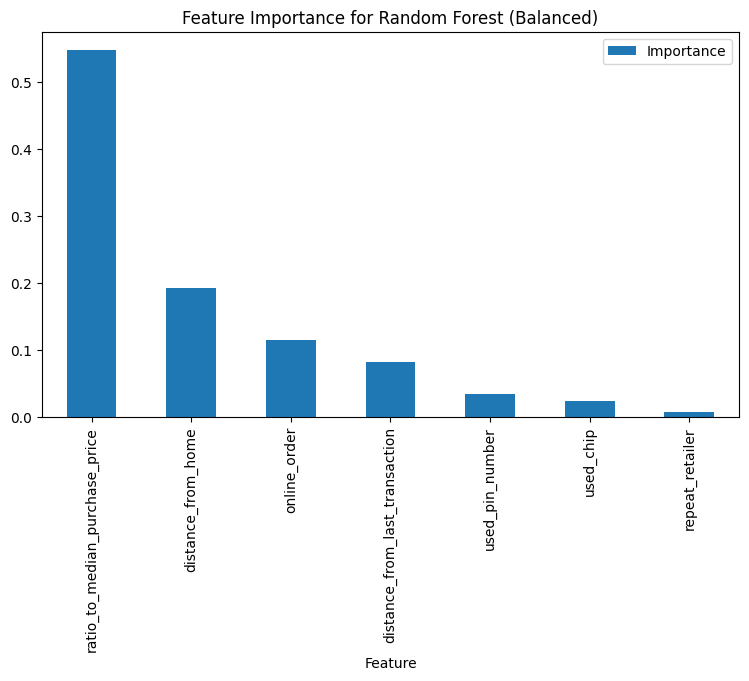

In [ ]:
# Get feature importances for the new Random Forest model

feature_importances_new = model_rf_balanced.feature_importances_  # This attribute of the trained Random Forest model returns an array of importance scores for each feature.
importance_df_new = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances_new})  # Combine the feature names and their importance scores into a DataFrame

# Sort and plot feature importance
importance_df_new = importance_df_new.sort_values(by='Importance', ascending=False)  # Sort the DataFrame into descending order
importance_df_new.plot(kind='bar', x='Feature', y='Importance', title='Feature Importance for Random Forest (Balanced)', figsize=(9, 5))  # Create the bar chart
plt.show()

In order to compare the above feature importance results with the feature important results in the original random forest model, let's print both and compare.

Original Random Forest model:

In [ ]:
for feature, importance in zip(X.columns, feature_importances):
    print(f"Feature: {feature}, Importance: {importance:.4f}")

Feature: distance_from_home, Importance: 0.1349
Feature: distance_from_last_transaction, Importance: 0.0457
Feature: ratio_to_median_purchase_price, Importance: 0.5272
Feature: repeat_retailer, Importance: 0.0068
Feature: used_chip, Importance: 0.0521
Feature: used_pin_number, Importance: 0.0639
Feature: online_order, Importance: 0.1694


Rebalanced Random Forest model:

In [ ]:
for feature, importance in zip(X.columns, feature_importances_new):
    print(f"Feature: {feature}, Importance: {importance:.4f}")

Feature: distance_from_home, Importance: 0.1918
Feature: distance_from_last_transaction, Importance: 0.0813
Feature: ratio_to_median_purchase_price, Importance: 0.5474
Feature: repeat_retailer, Importance: 0.0072
Feature: used_chip, Importance: 0.0244
Feature: used_pin_number, Importance: 0.0336
Feature: online_order, Importance: 0.1143


Let's display the differences in feature importances between the two models using a bar chart.

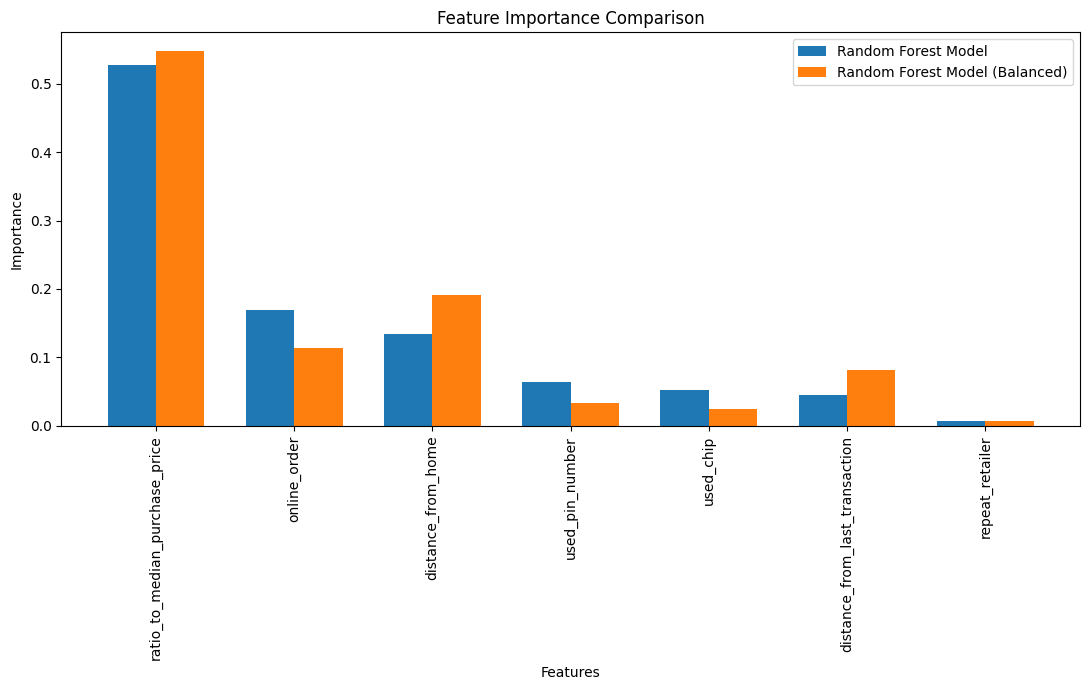

In [ ]:
combined_df = pd.merge(importance_df, importance_df_new, on='Feature', suffixes=('_Dataset_1', '_Dataset_2'))  # Combine the two datasets into single dataframe

x = np.arange(len(combined_df['Feature']))  # Label locations
width = 0.35  # Width of the bars

fig, ax = plt.subplots(figsize=(11, 7))
bars1 = ax.bar(x - width/2, combined_df['Importance_Dataset_1'], width, label='Random Forest Model ')
bars2 = ax.bar(x + width/2, combined_df['Importance_Dataset_2'], width, label='Random Forest Model (Balanced)')

# Adding labels, title, and legend
ax.set_xlabel('Features')
ax.set_ylabel('Importance')
ax.set_title('Feature Importance Comparison')
ax.set_xticks(x)
ax.set_xticklabels(combined_df['Feature'], rotation=90)  # Rotate labels for better visibility
ax.legend()

# Display the chart
plt.tight_layout()
plt.show()


As shown above, in both models, the feature "ratio_to_median_purchase_price" is the most predictive and "repeat_retailer" is the least.  However, there are notable differences.  For example, "distance_from_home" is the second most important feature in the new random forest model but third most important in the first version.  We would expect some differences between the two models because the second model is trained on a much smaller and balanced dataset.